# 06_231226_PRSadvance

******************************

## 使用するデータのチェック

In [12]:
%%bash
#PRSを計算した時にQCしたトンガサンプルのチェック
ls ~/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/targetdata/Tongan.QC.FIXP.phased.annotated.vcf.gz

/home/hmiwa/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/targetdata/Tongan.QC.FIXP.phased.annotated.vcf.gz


In [18]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance
mkdir -p analysis
ls

analysis
testdir


In [22]:
%%bash
pwd
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance
pwd
cp ~/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/targetdata/Tongan.QC.FIXP.phased.annotated.vcf.gz* analysis/

/home/hmiwa/hmiwa/hmiwa-lab/d_20231023/06_231226_PRSadvance
/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance


In [26]:
%%bash
ls ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis/

Tongan.QC.FIXP.phased.annotated.vcf.gz
Tongan.QC.FIXP.phased.annotated.vcf.gz.csi


In [28]:
%%bash
#PRSを計算した時に使ったGWAS結果のチェック
ls ~/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/Basedata/BMI_Eastern_Asian.QC2.txt

/home/hmiwa/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/Basedata/BMI_Eastern_Asian.QC2.txt


In [29]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance
cp ~/hmiwa1/storage/hmiwa-lab/05_231211_RePRSTrials/Basedata/BMI_Eastern_Asian.QC2.txt analysis/

関数定義コードも用意しておこう。

In [32]:
%%bash
ls ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir/helper_functions_coal_sel.R

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir/helper_functions_coal_sel.R


In [37]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/
pwd
ls
cp testdir/helper_functions_coal_sel.R analysis/

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance
analysis
testdir


RentPlusも必要ですね

In [48]:
%%bash
ls ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir/RentPlus.jar

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir/RentPlus.jar


In [49]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/
pwd
ls
cp testdir/RentPlus.jar analysis/

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance
analysis
testdir


## 解析開始

### 解析データ形式等のチェック

In [43]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/
ls

analysis
testdir


In [57]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/
ls analysis

BMI_Eastern_Asian.QC2.txt
helper_functions_coal_sel.R
RentPlus.jar
Tongan.QC.FIXP.phased.annotated.vcf.gz
Tongan.QC.FIXP.phased.annotated.vcf.gz.csi


In [44]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir
ls

GBR_IDS.txt
height_lr_3ests.pdf
height_lr_3ests.tif
helper_functions_coal_sel.R
neale.height.best.snp.tsv
rent_1700_trees_1KG_height_UKB_neale_processed_072318.RData
rent_1700_trees_1KG_neale_height_071918.RData
RentPlus.jar
rentplus_test.RData
rentplus_trees_1700_height_1KG.R
Rplots.pdf
temp


In [46]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/testdir
#id_file #sample name
head GBR_IDS.txt

HG00096
HG00097
HG00099
HG00100
HG00101
HG00102
HG00103
HG00105
HG00106
HG00107


In [119]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/
ls 05_231211_RePRSTrials/targetdata/TNG.nonmix.QC.fam

05_231211_RePRSTrials/targetdata/TNG.nonmix.QC.fam


In [120]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/
head 05_231211_RePRSTrials/targetdata/TNG.nonmix.QC.fam

T104 T104 0 0 0 -9
T105 T105 0 0 0 -9
T106 T106 0 0 0 -9
T109 T109 0 0 0 -9
T120 T120 0 0 0 -9
T150 T150 0 0 0 -9
T153 T153 0 0 0 -9
T15 T15 0 0 0 -9
T26 T26 0 0 0 -9
T76 T76 0 0 0 -9


In [163]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/
cat 05_231211_RePRSTrials/targetdata/TNG.nonmix.QC.fam \
| sed -e 's/ /,/g' \
| awk -F "," '{print $1}' \
> 06_231226_PRSadvance/analysis/TNG_nonmix.ids

In [164]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/
head 06_231226_PRSadvance/analysis/TNG_nonmix.ids

T104
T105
T106
T109
T120
T150
T153
T15
T26
T76


In [165]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/
#height_fn #GWAS results
head -n 5 testdir/neale.height.best.snp.tsv
echo ""
head -n 5 analysis/BMI_Eastern_Asian.QC2.txt

CHROM	POS	A1	A2	CHROM:POS	rsid	nCompleteSamples	AC	ytx	beta	se	tstat	pval	Block
1	958248	A	G	1:958248	rs2001744	336474	2.47091e+05	1.22927e+04	1.02295e-02	1.79298e-03	5.70527e+00	1.16258e-08	1
1	2142518	A	C	1:2142518	rs380190	336474	1.87183e+05	1.05732e+04	1.59487e-02	1.94239e-03	8.21087e+00	2.20363e-16	2
1	3769276	G	C	1:3769276	rs6668213	336474	4.63182e+05	1.88966e+04	-9.13069e-03	1.86504e-03	-4.89570e+00	9.79993e-07	3
1	4986470	G	T	1:4986470	rs2411956	336474	9.23723e+04	3.15752e+03	-9.00346e-03	2.53800e-03	-3.54746e+00	3.89012e-04	4

CHR	POS	REF	ALT	SNPNAME	EAS	EAS_MAF	ExAC_EAS	ExAC_EAS_MAF	beta	se	Pvalue
10	100010909	C	T	rs141069497	T	0.0139	T	0.006614	-	-0.022	0.1	0.83
10	100017453	T	G	rs1983864	G	0.6081	G	0.5682	-	-0.031	0.015	0.044
10	100017532	G	A	rs77858766	A	0.0169	A	0.01781	-	-0.016	0.058	0.79
10	100017553	G	T	rs11189525	T	0.0129	T	0.007404	-	-0.014	0.13	0.91


形式が違うので使われている場面をチェックします。

```R
#height_fnはここだけらしい
mark.dat <- fread(height_fn, head = TRUE)
```

```R
#mark.datを参照する行 #スクリプト構造無視
nmarks <- nrow(mark.dat)
snps.fail1 <- rep(0, dim(mark.dat)[1])
snps.miss <- rep(0, dim(mark.dat)[1])
for(i in 1:dim(mark.dat)[1]){
   snp <- mark.dat[i,6]
   pos.snp <- mark.dat[i,2]
   chr <- mark.dat[i,1]
mean(as.character(mark.dat$A2) == info.sites.char[,4]) #allele1 matches A2 in each case, polarization good.
mean(as.character(mark.dat$rsid) == info.sites.char[,1]) #check that the rsids match
beta <- mark.dat$beta
rsID <- mark.dat$rsid
```

neale.height.best.snp.tsvのheader
1. CHROM【要】	
2. POS【要】	
3. A1	
4. A2【要】	
5. CHROM:POS	
6. rsid【要】
7. nCompleteSamples	
8. AC	
9. ytx	
10. beta【要】	
11. se	
12. tstat	
13. pval	
14. Block

BMI_Eastern_Asian.QC2.txtのheader
1. CHR【要】	
2. POS【要】	
3. REF	
4. ALT【要】	
5. SNPNAME【要】	
6. EAS	
7. EAS_MAF	
8. ExAC_EAS	
9. ExAC_EAS_MAF	
10. beta【要】	
11. se	
12. Pvalue

In [136]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
cat BMI_Eastern_Asian.QC2.txt | \
awk '{print $1, "\t", $2, "\t", $3, "\t", $4, "\t", $5, "\t", $10}' | \
grep -v - | \
sed -e s/REF/A1/g -e s/ALT/A2/g -e s/SNPNAME/rsid/g \
> eastasia.bmi.snp.tsv

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis


In [122]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
ls -l

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
total 132388
-rw-rw-r-- 1 hmiwa hmiwa   1676097  1月  7 18:11 BMI_Eastern_Asian.QC2.txt
-rw-rw-r-- 1 hmiwa hmiwa    590212  1月  7 19:18 eastasia.bmi.snp.tsv
-rw-rw-r-- 1 hmiwa hmiwa     71939  1月  7 18:19 helper_functions_coal_sel.R
-rw-rw-r-- 1 hmiwa hmiwa     42901  1月  7 18:29 RentPlus.jar
drwxrwxr-x 2 hmiwa hmiwa      4096  1月  7 19:36 temp
-rw-rw-r-- 1 hmiwa hmiwa    250734  1月  7 19:35 test.RData
-rw-rw-r-- 1 hmiwa hmiwa      6944  1月  7 19:30 test.tsv
-rw-rw-r-- 1 hmiwa hmiwa       396  1月  7 20:34 TNG_nonmix.ids
-rw-rw-r-- 1 hmiwa hmiwa 131412291  1月  7 18:08 Tongan.QC.FIXP.phased.annotated.vcf.gz
-rw-rw-r-- 1 hmiwa hmiwa   1483780  1月  7 18:08 Tongan.QC.FIXP.phased.annotated.vcf.gz.csi


In [87]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
head eastasia.bmi.snp.tsv
wc eastasia.bmi.snp.tsv

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
CHR 	 POS 	 A1 	 A2 	 rsid 	 beta
10 	 100020880 	 C 	 T 	 rs33995374 	 0.077
10 	 100044136 	 G 	 A 	 rs4919199 	 0.0076
10 	 100144782 	 C 	 T 	 rs2296441 	 0.012
10 	 100148004 	 T 	 C 	 rs2182169 	 0.014
10 	 100148176 	 A 	 G 	 rs2147896 	 0.0052
10 	 101048492 	 G 	 A 	 rs2862553 	 0.018
10 	 101492403 	 T 	 G 	 rs2281636 	 0.0079
10 	 101563815 	 G 	 A 	 rs2273697 	 0.0035
10 	 101805442 	 C 	 T 	 rs11599750 	 0.012
 14005  84030 590212 eastasia.bmi.snp.tsv


### コードテスト

小規模データでテスト実行しましょう。

In [59]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
head -n 1 eastasia.bmi.snp.tsv > test.tsv
grep -e ^21 eastasia.bmi.snp.tsv >> test.tsv
head test.tsv
wc test.tsv

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
CHR 	 POS 	 A1 	 A2 	 rsid 	 beta
21 	 15516948 	 C 	 T 	 rs2822432 	 0.031
21 	 15524921 	 C 	 T 	 rs74369337 	 0.021
21 	 15596772 	 T 	 G 	 rs409782 	 0.013
21 	 15653065 	 A 	 G 	 rs2822544 	 0.0062
21 	 15845052 	 A 	 G 	 rs1006899 	 0.038
21 	 16211191 	 T 	 G 	 rs6517050 	 0.0089
21 	 16438793 	 A 	 G 	 rs2223043 	 0.0019
21 	 16537728 	 T 	 G 	 rs2823109 	 0.022
21 	 16805220 	 T 	 C 	 rs1736135 	 0.012
 165  990 6978 test.tsv


In [112]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
mkdir -p temp

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis


In [1]:
%load_ext rpy2.ipython

In [61]:
%%R
#ディレクトリチェック
print(getwd())
setwd("~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis")
print(getwd())
save.image(file = "test.RData")

[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"
[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"


In [86]:
%%R
load("test.RData")
#ライブラリ読み込み
print(getwd())
library(psych)
library(data.table)
library(ape)
save.image(file = "test.RData")

[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"


In [63]:
%%R
load("test.RData")
#ファイル名定義
id_file <- "TNG_nonmix.ids" #要変更
vcf_file <- "temp/test.vcf"
out_pref <- "temp/hap"
rent_file <- "temp/rent_in.txt"
rentplus_fn <- "RentPlus.jar"
height_fn <- "test.tsv" #要変更
helper_fn <- "helper_functions_coal_sel.R"
target_vcf <- "Tongan.QC.FIXP.phased.annotated.vcf.gz"
save.image(file = "test.RData")

In [64]:
%%R
load("test.RData")
#関数名セット
source(helper_fn)
save.image(file = "test.RData")

In [65]:
%%R
load("test.RData")
#ファイル読み込み
mark.dat <- fread(height_fn, head = TRUE)
nmarks <- nrow(mark.dat)

#ウィンドウサイズ
wid <- 100000 #half-window size around focal locus to extract

#格納用変数セット
n_ders <- numeric(0)
thetas <- numeric(0)

trees.all <- list()
trees.anc <- list()
trees.der <- list()

seg.sites <- numeric()
meas.length <- numeric()
n.chrs <- numeric()

snps.fail1 <- rep(0, dim(mark.dat)[1])
snps.miss <- rep(0, dim(mark.dat)[1])
monomorphic_loci <- numeric()

info.sites <- list() # for each snp, ID pos allele0 allele1

#ログファイル用意
system("echo '' > temp/tmp")
system("echo '' > temp/log")

save.image(file = "test.RData")

In [66]:
%%R
load("test.RData")
for(i in 1:dim(mark.dat)[1]){
   snp <- mark.dat[i,5]
   pos.snp <- mark.dat[i,2]
   chr <- mark.dat[i,1]
   lb <- pos.snp - wid
   ub <- pos.snp + wid

   rent.tmp <- paste("echo '[", "SNP", as.character(i), "]' `date` >> temp/tmp", sep = "")
   system(rent.tmp)

   #Write a string that will call tabix to extract a vcf from 1000 genomes.
   #tabix.str <- paste("tabix -h ~/hmiwa1/rawdata/1KGa/ALL.chr", as.character(chr), ".phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz ", as.character(chr), ":", as.character(lb), "-", as.character(ub), " | ~/homebrew/bin/vcf-subset -c ", id_file, " > ", vcf_file, sep = "")
   tabix.str <- paste("tabix -h ", target_vcf , " ", as.character(chr), ":", as.character(lb), "-", as.character(ub), " | ~/homebrew/bin/vcf-subset -c ", id_file, " > ", vcf_file, sep = "")
   system(tabix.str)

   #Write to IMPUTE format, which is easy to change to RENT+ format.
   #vcftools.str <- paste("vcftools --vcf ", vcf_file, " --out ", out_pref, " --IMPUTE", sep = "")
   vcftools.str <- paste("~/homebrew/bin/vcftools --vcf ", vcf_file, " --out ", out_pref, " --IMPUTE 2>> temp/log",sep = "")
   system(vcftools.str)

   #Read in the IMPUTE format haplotypes, keep polymorphic loci, and 
   #rearrange into RENT+ format. We shuffle so that the derived alleles
   #are at the end.

   hap.fn <- paste(out_pref, ".impute.hap",sep = "")
   haps <- try(as.matrix(read.table(hap.fn)))
   if (inherits(haps, 'try-error')){
       print(paste("SNP", as.character(i), "has a problem"))
       snps.fail1[i] <- 1 
       next
   }
   info.fn <- paste(out_pref, ".impute.legend",sep = "")
   info <- read.table(info.fn, head = TRUE)

   loci.poly <- rowMeans(haps) > 0 & rowMeans(haps < 1)
   haps.poly <- haps[loci.poly,]
   info.poly <- info[loci.poly,]
   col.keysnp <- which(info.poly$pos == as.numeric(pos.snp))
   info.sites[[i]] <- info.poly[col.keysnp,]
   if(length(col.keysnp) == 0){
      print(paste("SNP", as.character(i), "missing from TNG"))
      snps.miss[i] <- 1    
      next 
   }
   n_der <- sum(haps.poly[col.keysnp,])
   haps.poly.der.at.end <- haps.poly[, order(haps.poly[col.keysnp,])]
   haps.charvec <- apply(t(haps.poly.der.at.end), 1, paste, sep = "", collapse = "")
   haps.char <- paste(haps.charvec, sep = "", collapse = "\n")
   pos.char <- paste(as.character(info.poly$pos), sep = "", collapse = " ")
   rentfile.str <- paste(pos.char, haps.char, sep = "\n", collapse = "")
   write(rentfile.str, rent_file)

   seg.sites[i] <- sum(loci.poly)
   n.chrs[i] <- ncol(haps)
   n_ders[i] <- n_der
   meas.length[i] <- max(info.poly$pos) - min(info.poly$pos)
   if(n_der == n.chrs[i] | n_der == 0){
      monomorphic_loci <- c(monomorphic_loci, i)
      print(paste("SNP", as.character(i), "is monomorphic in the sample")) 
      next
   }


   #run rent+
   #rent.string <- paste("java -jar ", rentplus_fn, " -t ",  rent_file, sep = "")
   rent.string <- paste("java -Xmx8g -jar ", rentplus_fn, " -t ", rent_file, " >> temp/tmp",sep = "")
   system(rent.string)

   #read in theta estimate
   rent_theta_fn <- paste(rent_file, ".theta", sep = "")
   thetas[i] <- suppressWarnings(as.numeric(read.table(rent_theta_fn, nrows = 1)$V1))

   #Read in trees at selected site in rent and rent+
   rent_trees_fn <- paste(rent_file, ".trees", sep = "")
   rent_trees <- readLines(rent_trees_fn)

   #which tree is for the focal site?
   rent_tr_ind <- grep(paste(as.character(pos.snp), "\t", sep = ""), rent_trees)

   #get tree at focal site in newick format.
   rent_tree_newick <- sub(paste(as.character(pos.snp), "\t", sep = ""), "", rent_trees[rent_tr_ind])
   rent_tree <- read.tree(text = paste(rent_tree_newick, ";", sep = ""))

   n_chroms <- dim(haps.poly)[2]
   anc_tips <- which(rent_tree$tip.label %in% as.character(1:(n_chroms - n_der))) 
   der_tips <- which(as.numeric(rent_tree$tip.label) %in% (n_chroms - n_der + 1):n_chroms)
   anc_tree <- drop.tip(rent_tree, der_tips)
   der_tree <- drop.tip(rent_tree, anc_tips)

   
   trees.all[[i]] <- rent_tree
   trees.anc[[i]] <- anc_tree
   trees.der[[i]] <- der_tree

   print(paste("round", as.character(i), "complete"))
   print(paste("segsites =", as.character(seg.sites[i])))
   print(paste("measured length =", as.character(meas.length[i])))
}
save.image(file = "test.RData")

[1] "SNP 1 missing from TNG"
[1] "round 2 complete"
[1] "segsites = 1135"
[1] "measured length = 199271"
[1] "round 3 complete"
[1] "segsites = 1105"
[1] "measured length = 199552"
[1] "round 4 complete"
[1] "segsites = 1131"
[1] "measured length = 199930"
[1] "round 5 complete"
[1] "segsites = 731"
[1] "measured length = 199853"
[1] "round 6 complete"
[1] "segsites = 470"
[1] "measured length = 199657"
[1] "round 7 complete"
[1] "segsites = 621"
[1] "measured length = 198669"
[1] "round 8 complete"
[1] "segsites = 623"
[1] "measured length = 199388"
[1] "round 9 complete"
[1] "segsites = 446"
[1] "measured length = 199228"
[1] "round 10 complete"
[1] "segsites = 440"
[1] "measured length = 198029"
[1] "round 11 complete"
[1] "segsites = 468"
[1] "measured length = 199799"
[1] "round 12 complete"
[1] "segsites = 437"
[1] "measured length = 197184"
[1] "round 13 complete"
[1] "segsites = 426"
[1] "measured length = 199454"
[1] "round 14 complete"
[1] "segsites = 535"
[1] "measured lengt

160SNP計算するのに10分

In [55]:
%%R
load("test.RData")
n_ancs <- n_chroms- n_ders

#Checks that SNPS worked.
monomorphic_loci #empty---no loci were monomorphic.
print(mean(snps.fail1))
print(mean(snps.miss))
save.image(file = "test.RData")

[1] 0
[1] 0.1656442


In [72]:
%%R
load("test.RData")
#Check polarization

misid <- NULL
info.sites.char <- matrix("", nrow = length(info.sites), ncol = 4)
for(i in 1:length(info.sites)){
    if(nrow(info.sites[[i]])==0){
        print(paste("SNP",i, " is missing"))
        misid <- c(misid,i)
        next
    }else{
	info.sites.char[i,1] <- as.character(info.sites[[i]]$ID)
	info.sites.char[i,2] <- as.character(info.sites[[i]]$pos)
	info.sites.char[i,3] <- as.character(info.sites[[i]]$allele0)
	info.sites.char[i,4] <- as.character(info.sites[[i]]$allele1)
    }
}
save.image(file = "test.RData")

[1] "SNP 1  is missing"
[1] "SNP 19  is missing"
[1] "SNP 48  is missing"
[1] "SNP 75  is missing"
[1] "SNP 78  is missing"
[1] "SNP 80  is missing"
[1] "SNP 88  is missing"
[1] "SNP 89  is missing"
[1] "SNP 92  is missing"
[1] "SNP 93  is missing"
[1] "SNP 103  is missing"
[1] "SNP 104  is missing"
[1] "SNP 114  is missing"
[1] "SNP 118  is missing"
[1] "SNP 127  is missing"
[1] "SNP 130  is missing"
[1] "SNP 131  is missing"
[1] "SNP 133  is missing"
[1] "SNP 141  is missing"
[1] "SNP 143  is missing"
[1] "SNP 144  is missing"
[1] "SNP 150  is missing"
[1] "SNP 154  is missing"
[1] "SNP 155  is missing"
[1] "SNP 156  is missing"
[1] "SNP 158  is missing"
[1] "SNP 161  is missing"
[1] "SNP 162  is missing"


In [216]:
%%R
load("test.RData")
print(mean(as.character(mark.dat$A2[-misid]) == info.sites.char[-misid,4])) #allele1 matches A2 in each case, polarization good.
print(mean(as.character(mark.dat$rsid[-misid]) == info.sites.char[-misid,1])) #check that the rsids match

beta <- mark.dat$beta[-misid]
rsID <- mark.dat$rsid[-misid]

save.image(file = "test.RData")

[1] 1
[1] 1


In [217]:
%%R
load("test.RData")
trees.der.rescale <- trees.der[-misid]
trees.anc.rescale <- trees.anc[-misid]
trees.all.rescale <- trees.all[-misid]
for(i in 1:length(trees.all.rescale)){
    j <- c(1:length(trees.all))[-misid][i]
	trees.der.rescale[[i]]$edge.length <- trees.der[[j]]$edge.length*thetas[j]
	trees.anc.rescale[[i]]$edge.length <- trees.anc[[j]]$edge.length*thetas[j]
	trees.all.rescale[[i]]$edge.length <- trees.all[[j]]$edge.length*thetas[j]
}
save.image(file = "test.RData")

In [218]:
%%R
load("test.RData")
tmrcas <- numeric(0)
for(i in 1:length(trees.all.rescale)){
	tmrcas[i] <- max(branching.times(trees.all.rescale[[i]]))
}
save.image(file = "test.RData")

In [219]:
%%R
load("test.RData")
for(i in 1:length(trees.all.rescale)){
	trees.der.rescale[[i]]$edge.length <- trees.der.rescale[[i]]$edge.length*2/mean(tmrcas)
	trees.anc.rescale[[i]]$edge.length <- trees.anc.rescale[[i]]$edge.length*2/mean(tmrcas)
	trees.all.rescale[[i]]$edge.length <- trees.all.rescale[[i]]$edge.length*2/mean(tmrcas)
}
save.image(file = "test.RData")

In [220]:
%%R
load("test.RData")
time <- seq(0, 4, by = 0.001)

times.c <- list()
for(i in 1:length(trees.all.rescale)){
	times.c[[i]] <- trees_to_times(trees.all.rescale[[i]], trees.anc.rescale[[i]], trees.der.rescale[[i]], time, sure.alt.is.derived = FALSE)
}
save.image(file = "test.RData")

In [221]:
%%R
load("test.RData")
lins.list <- list()
for(i in 1:length(trees.all.rescale)){
	lins.list[[i]] <- times_to_lins(times.c[[i]], time)
}
save.image(file = "test.RData")

In [231]:
%%R
load("test.RData")
Va.poly <- add.var(beta, (n_ders[-misid]/n_chroms))
add.var(beta / sqrt(Va.poly), (n_ders[-misid]/n_chroms))

beta.r <- beta / sqrt(Va.poly)
save.image(file = "test.RData")

In [232]:
%%R
load("test.RData")
#neutral
trajs_neut <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
vars_neut_bin <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
#vars_neut_post <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){	
	trajs_neut[,i] <- est_af_traj_neut(lins.list[[i]])
	vars_neut_bin[,i] <- est_af_var_neut_bin(lins.list[[i]])
	#vars_neut_post[,i] <- est_af_var_neut_post(lins.list[[i]])
}

trajs_neut[time == 0,] <- (n_ders[-misid]/n_chroms) #in the present, just use sample allele frequency.
#This is the same as the output of est_af_traj_neut() if no coalescent times get rounded to 0.
vars_neut_bin[time == 0,] <- (n_ders[-misid]/n_chroms)*(1 - (n_ders[-misid]/n_chroms))/n_chroms
traj.phen.neut <- 2 * trajs_neut %*%  beta.r
var.phen.neut.bin <- 4 * vars_neut_bin %*% beta.r^2
#var.phen.neut.post <- 4 * vars_neut_post %*% beta^2
save.image(file = "test.RData")

In [233]:
%%R
load("test.RData")
#waiting time-based estimates and variance
trajs_est_wt_l1 <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
trajs_var_wt_l1 <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){
	wt.estvar <- p_ests_wait(times.c[[i]], time, ell.ref = 1, ell.alt = 1)
	trajs_est_wt_l1[,i] <- wt.estvar[,1]	
	trajs_var_wt_l1[,i] <- wt.estvar[,2]	
}
traj.phen.wt_l1 <- 2 * trajs_est_wt_l1 %*%  beta.r 
var.phen.wt_l1 <- 4 * trajs_var_wt_l1 %*%  beta.r^2 
traj.phen.wt_l1[time == 0] <- traj.phen.neut[time == 0]
var.phen.wt_l1[time == 0] <- var.phen.neut.bin[time == 0]
save.image(file = "test.RData")

In [234]:
%%R
load("test.RData")
#lineage number based estimates and variance.
trajs_mom_smoothtime <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
trajs_var_mom_smoothtime <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){		
	trajs_mom_smoothtime[,i] <- est_af_traj_mom.smoothtime(lins.list[[i]], time)
	trajs_var_mom_smoothtime[,i] <- est_af_var_mom.smoothtime_coaltimes(lins.list[[i]], time)
}
traj.phen.mom_smoothtime <- 2 * trajs_mom_smoothtime %*%  beta.r 
traj.phen.mom_smoothtime[time == 0] <- traj.phen.neut[time == 0] 
#trajs_var_mom_smoothtime.nonan <- trajs_var_mom_smoothtime
#trajs_var_mom_smoothtime.nonan[is.nan(trajs_var_mom_smoothtime.nonan)] <- 0
var.phen.mom_smoothtime <- 4 * trajs_var_mom_smoothtime %*%  beta.r^2 
var.phen.mom_smoothtime[time == 0] <- var.phen.neut.bin[time == 0]
save.image(file = "test.RData")

[1] -0.03754529


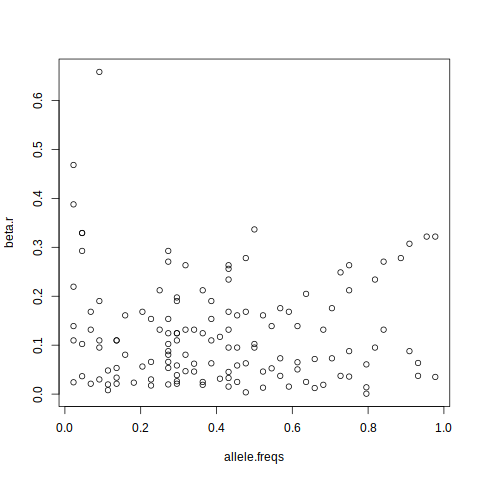

In [235]:
%%R
load("test.RData")
allele.freqs <- n_ders[-misid]/n_chroms
plot(allele.freqs, beta.r)
print(cor(allele.freqs, abs(beta.r)))
save.image(file = "test.RData")

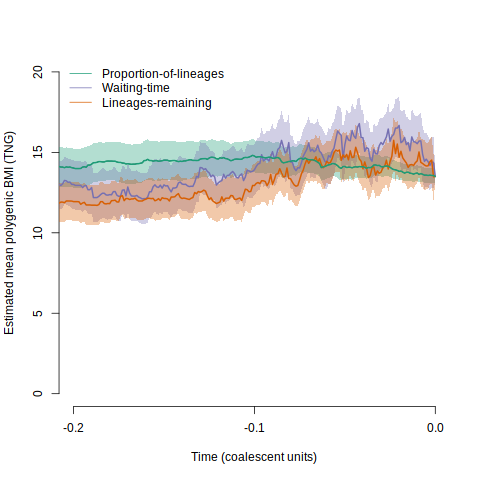

In [248]:
%%R
load("test.RData")
pal <- c('#1b9e77','#d95f02','#7570b3','#e7298a')
pal <- c(rgb(27/256,158/256,119/256),rgb(217/256,95/256,2/256),rgb(117/256,112/256,179/256),rgb(231/256,41/256,138/256))
pal.int <- c(rgb(27/256,158/256,119/256,1/3),rgb(217/256,95/256,2/256,1/3),rgb(117/256,112/256,179/256,1/3),rgb(231/256,41/256,138/256,1/3))

#plot(-time, traj.phen.neut, type = "l", xlab = "Time (coalescent units)", ylab = "Estimated mean polygenic height (UK 1000G)", ylim = c(-5, 5), xlim = c(-0.2, 0), xaxt = "n", bty = "n")
plot(-time, traj.phen.neut, type = "l", xlab = "Time (coalescent units)", ylab = "Estimated mean polygenic BMI (TNG)", ylim = c(0, 20), xlim = c(-0.2, 0), xaxt = "n", bty = "n")
axis(1, at = c(0, -.1, -.2))
polygon(c(-time, rev(-time)), c(traj.phen.neut + 1.96*sqrt(var.phen.neut.bin), rev(traj.phen.neut - 1.96*sqrt(var.phen.neut.bin))) , col = pal.int[1], border = NA)
polygon(c(-time, rev(-time)), c(traj.phen.wt_l1 + 1.96*sqrt(var.phen.wt_l1), rev(traj.phen.wt_l1  - 1.96*sqrt(var.phen.wt_l1 ))) , col = pal.int[3], border = NA)
polygon(c(-time[1:1000], rev(-time[1:1000])), c(traj.phen.mom_smoothtime[1:1000] + 1.96*sqrt(var.phen.mom_smoothtime[1:1000]), rev(traj.phen.mom_smoothtime[1:1000]  - 1.96*sqrt(var.phen.mom_smoothtime[1:1000] ))) , col = pal.int[2], border = NA)
lines(-time, traj.phen.wt_l1, col = pal[3], lwd = 2)
lines(-time, traj.phen.mom_smoothtime, col = pal[2], lwd = 2)
lines(-time, traj.phen.neut, col = pal[1], lwd = 2)
legend("topleft", lwd = 1, col = pal[c(1,3,2)], legend = c("Proportion-of-lineages", "Waiting-time", "Lineages-remaining"), bty = "n")
save.image(file = "test.RData")

これでとりあえず動きました。小サイズテストはこれでよかろう。

160SNPで10分だったことを考えると、16000SNPで1000分。

1日はかからないのでここでそのままやってしまえばよかろう。

### 本解析

In [9]:
%%bash
ls

BMI_Eastern_Asian.QC2.txt
eastasia.bmi.snp.auto.tsv
eastasia.bmi.snp.tsv
helper_functions_coal_sel.R
RentPlus.jar
temp
test.RData
test.tsv
TNG_nonmix.ids
TNG_nonmix.RData
Tongan.QC.FIXP.phased.annotated.vcf.gz
Tongan.QC.FIXP.phased.annotated.vcf.gz.csi


In [7]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
grep -v X eastasia.bmi.snp.tsv > eastasia.bmi.snp.auto.tsv
head eastasia.bmi.snp.auto.tsv
tail eastasia.bmi.snp.auto.tsv
wc eastasia.bmi.snp.auto.tsv

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
CHR 	 POS 	 A1 	 A2 	 rsid 	 beta
10 	 100020880 	 C 	 T 	 rs33995374 	 0.077
10 	 100044136 	 G 	 A 	 rs4919199 	 0.0076
10 	 100144782 	 C 	 T 	 rs2296441 	 0.012
10 	 100148004 	 T 	 C 	 rs2182169 	 0.014
10 	 100148176 	 A 	 G 	 rs2147896 	 0.0052
10 	 101048492 	 G 	 A 	 rs2862553 	 0.018
10 	 101492403 	 T 	 G 	 rs2281636 	 0.0079
10 	 101563815 	 G 	 A 	 rs2273697 	 0.0035
10 	 101805442 	 C 	 T 	 rs11599750 	 0.012
9 	 98278972 	 T 	 C 	 rs202111971 	 0.054
9 	 98367717 	 C 	 T 	 rs10818991 	 0.014
9 	 98410405 	 C 	 T 	 rs10990303 	 0.0081
9 	 98482261 	 T 	 G 	 rs10733574 	 0.0021
9 	 98638306 	 C 	 T 	 rs56108623 	 0.029
9 	 98794679 	 G 	 A 	 rs10760718 	 0.031
9 	 99064296 	 C 	 T 	 rs2066480 	 0.024
9 	 99280421 	 A 	 G 	 rs7852498 	 0.0085
9 	 99525487 	 A 	 G 	 rs3780548 	 0.0071
9 	 99580834 	 A 	 C 	 rs75989782 	 0.006
 13741  82446 579138 eastasia.bmi.snp.auto.tsv


In [19]:
%%bash
cd ~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
pwd
cat eastasia.bmi.snp.auto.tsv | head -n 1 > test2.tsv
cat eastasia.bmi.snp.auto.tsv | sed -n 7985,8000p >> test2.tsv
cat test2.tsv
wc test2.tsv
# has a probremになったSNPは5桁だったので修正テストをした。

/home/hmiwa/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis
CHR 	 POS 	 A1 	 A2 	 rsid 	 beta
2 	 43587504 	 C 	 T 	 rs6732426 	 0.026
2 	 43638185 	 C 	 T 	 rs7567607 	 0.021
2 	 43783141 	 A 	 G 	 rs6725776 	 0.0028
2 	 43797619 	 C 	 T 	 rs17031056 	 0.01
2 	 43903262 	 C 	 A 	 rs74589926 	 0.078
2 	 43927538 	 C 	 A 	 rs17031297 	 0.029
2 	 44116923 	 C 	 T 	 rs147302249 	 0.019
2 	 44524575 	 T 	 C 	 rs4952710 	 0.023
2 	 44768202 	 T 	 C 	 rs2341459 	 0.021
2 	 45123765 	 G 	 T 	 rs6707760 	 0.0017
2 	 45512908 	 G 	 A 	 rs6707333 	 0.0043
2 	 45611 	 C 	 T 	 rs200415885 	 0.083
2 	 45646824 	 A 	 G 	 rs3213787 	 0.02
2 	 45995181 	 G 	 A 	 rs3924521 	 0.019
2 	 46023916 	 C 	 T 	 rs12472172 	 0.02
2 	 46353166 	 A 	 G 	 rs10495928 	 0.014
 17 102 696 test2.tsv


In [20]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [21]:
%%R
#ディレクトリチェック
print(getwd())
setwd("~/hmiwa1/storage/hmiwa-lab/06_231226_PRSadvance/analysis")
print(getwd())
#ライブラリ読み込み
print(getwd())
library(psych)
library(data.table)
library(ape)
#ファイル名定義
id_file <- "TNG_nonmix.ids" #要変更
vcf_file <- "temp/test.vcf"
out_pref <- "temp/hap"
rent_file <- "temp/rent_in.txt"
rentplus_fn <- "RentPlus.jar"
height_fn <- "eastasia.bmi.snp.auto.tsv" #要変更
helper_fn <- "helper_functions_coal_sel.R"
target_vcf <- "Tongan.QC.FIXP.phased.annotated.vcf.gz"
#関数名セット
source(helper_fn)

save.image(file = "TNG_nonmix.RData")

[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"
[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"
[1] "/home1/hmiwa/storage/hmiwa-lab/06_231226_PRSadvance/analysis"


In [22]:
%%R
load("TNG_nonmix.RData")

#ファイル読み込み
mark.dat <- fread(height_fn, head = TRUE)
nmarks <- nrow(mark.dat)

#ウィンドウサイズ
wid <- 100000 #half-window size around focal locus to extract

#格納用変数セット
n_ders <- numeric(0)
thetas <- numeric(0)

trees.all <- list()
trees.anc <- list()
trees.der <- list()

seg.sites <- numeric()
meas.length <- numeric()
n.chrs <- numeric()

snps.fail1 <- rep(0, dim(mark.dat)[1])
snps.miss <- rep(0, dim(mark.dat)[1])
monomorphic_loci <- numeric()

info.sites <- list() # for each snp, ID pos allele0 allele1

#ログファイル用意
system("echo '' > temp/tmp")
system("echo '' > temp/log")

save.image(file = "TNG_nonmix.RData")

In [23]:
%%R
load("TNG_nonmix.RData")

for(i in 1:dim(mark.dat)[1]){
   snp <- mark.dat[i,5]
   pos.snp <- mark.dat[i,2]
   chr <- mark.dat[i,1]
   lb <- pos.snp - wid
   if(lb < 0){
       lb <- 1
   }
   ub <- pos.snp + wid

   rent.tmp <- paste("echo '[", "SNP", as.character(i), "]' `date` >> temp/tmp", sep = "")
   system(rent.tmp)

   #Write a string that will call tabix to extract a vcf from 1000 genomes.
   #tabix.str <- paste("tabix -h ~/hmiwa1/rawdata/1KGa/ALL.chr", as.character(chr), ".phase3_shapeit2_mvncall_integrated_v5a.20130502.genotypes.vcf.gz ", as.character(chr), ":", as.character(lb), "-", as.character(ub), " | ~/homebrew/bin/vcf-subset -c ", id_file, " > ", vcf_file, sep = "")
   tabix.str <- paste("tabix -h ", target_vcf , " ", as.character(chr), ":", as.character(lb), "-", as.character(ub), " | ~/homebrew/bin/vcf-subset -c ", id_file, " > ", vcf_file, sep = "")
   system(tabix.str)

   #Write to IMPUTE format, which is easy to change to RENT+ format.
   #vcftools.str <- paste("vcftools --vcf ", vcf_file, " --out ", out_pref, " --IMPUTE", sep = "")
   vcftools.str <- paste("~/homebrew/bin/vcftools --vcf ", vcf_file, " --out ", out_pref, " --IMPUTE 2>> temp/log",sep = "")
   system(vcftools.str)

   #Read in the IMPUTE format haplotypes, keep polymorphic loci, and 
   #rearrange into RENT+ format. We shuffle so that the derived alleles
   #are at the end.

   hap.fn <- paste(out_pref, ".impute.hap",sep = "")
   haps <- try(as.matrix(read.table(hap.fn)))
   if (inherits(haps, 'try-error')){
       print(paste("SNP", as.character(i), "has a problem"))
       snps.fail1[i] <- 1 
       next
   }
   info.fn <- paste(out_pref, ".impute.legend",sep = "")
   info <- read.table(info.fn, head = TRUE)

   loci.poly <- rowMeans(haps) > 0 & rowMeans(haps < 1)
   haps.poly <- haps[loci.poly,]
   info.poly <- info[loci.poly,]
   col.keysnp <- which(info.poly$pos == as.numeric(pos.snp))
   info.sites[[i]] <- info.poly[col.keysnp,]
   if(length(col.keysnp) == 0){
      print(paste("SNP", as.character(i), "missing from TNG"))
      snps.miss[i] <- 1    
      next 
   }
   n_der <- sum(haps.poly[col.keysnp,])
   haps.poly.der.at.end <- haps.poly[, order(haps.poly[col.keysnp,])]
   haps.charvec <- apply(t(haps.poly.der.at.end), 1, paste, sep = "", collapse = "")
   haps.char <- paste(haps.charvec, sep = "", collapse = "\n")
   pos.char <- paste(as.character(info.poly$pos), sep = "", collapse = " ")
   rentfile.str <- paste(pos.char, haps.char, sep = "\n", collapse = "")
   write(rentfile.str, rent_file)

   seg.sites[i] <- sum(loci.poly)
   n.chrs[i] <- ncol(haps)
   n_ders[i] <- n_der
   meas.length[i] <- max(info.poly$pos) - min(info.poly$pos)
   if(n_der == n.chrs[i] | n_der == 0){
      monomorphic_loci <- c(monomorphic_loci, i)
      print(paste("SNP", as.character(i), "is monomorphic in the sample")) 
      next
   }


   #run rent+
   #rent.string <- paste("java -jar ", rentplus_fn, " -t ",  rent_file, sep = "")
   rent.string <- paste("java -Xmx8g -jar ", rentplus_fn, " -t ", rent_file, " >> temp/tmp",sep = "")
   system(rent.string)

   #read in theta estimate
   rent_theta_fn <- paste(rent_file, ".theta", sep = "")
   thetas[i] <- suppressWarnings(as.numeric(read.table(rent_theta_fn, nrows = 1)$V1))

   #Read in trees at selected site in rent and rent+
   rent_trees_fn <- paste(rent_file, ".trees", sep = "")
   rent_trees <- readLines(rent_trees_fn)

   #which tree is for the focal site?
   rent_tr_ind <- grep(paste(as.character(pos.snp), "\t", sep = ""), rent_trees)

   #get tree at focal site in newick format.
   rent_tree_newick <- sub(paste(as.character(pos.snp), "\t", sep = ""), "", rent_trees[rent_tr_ind])
   rent_tree <- read.tree(text = paste(rent_tree_newick, ";", sep = ""))

   n_chroms <- dim(haps.poly)[2]
   anc_tips <- which(rent_tree$tip.label %in% as.character(1:(n_chroms - n_der))) 
   der_tips <- which(as.numeric(rent_tree$tip.label) %in% (n_chroms - n_der + 1):n_chroms)
   anc_tree <- drop.tip(rent_tree, der_tips)
   der_tree <- drop.tip(rent_tree, anc_tips)

   
   trees.all[[i]] <- rent_tree
   trees.anc[[i]] <- anc_tree
   trees.der[[i]] <- der_tree

   print(paste("round", as.character(i), "complete"))
   print(paste("segsites =", as.character(seg.sites[i])))
   print(paste("measured length =", as.character(meas.length[i])))
}

save.image(file = "TNG_nonmix.RData")

[1] "round 1 complete"
[1] "segsites = 499"
[1] "measured length = 199843"
[1] "round 2 complete"
[1] "segsites = 511"
[1] "measured length = 198428"
[1] "round 3 complete"
[1] "segsites = 760"
[1] "measured length = 199361"
[1] "round 4 complete"
[1] "segsites = 747"
[1] "measured length = 199314"
[1] "round 5 complete"
[1] "segsites = 747"
[1] "measured length = 199314"
[1] "round 6 complete"
[1] "segsites = 574"
[1] "measured length = 199808"
[1] "round 7 complete"
[1] "segsites = 416"
[1] "measured length = 199599"
[1] "SNP 8 missing from TNG"
[1] "round 9 complete"
[1] "segsites = 541"
[1] "measured length = 199549"
[1] "SNP 10 missing from TNG"
[1] "round 11 complete"
[1] "segsites = 527"
[1] "measured length = 199932"
[1] "round 12 complete"
[1] "segsites = 569"
[1] "measured length = 199734"
[1] "round 13 complete"
[1] "segsites = 561"
[1] "measured length = 199864"
[1] "SNP 14 missing from TNG"
[1] "round 15 complete"
[1] "segsites = 540"
[1] "measured length = 199404"
[1] "ro

In [16]:
%%R
load("TNG_nonmix.RData")

n_ancs <- n_chroms- n_ders

#Checks that SNPS worked.
print(monomorphic_loci) #empty---no loci were monomorphic.
print(mean(snps.fail1))
print(mean(snps.miss))

save.image(file = "TNG_nonmix.RData")

[1] 0
[1] 0.25


In [17]:
%%R
load("TNG_nonmix.RData")

#Check polarization

misid <- NULL
info.sites.char <- matrix("", nrow = length(info.sites), ncol = 4)
for(i in 1:length(info.sites)){
    if(nrow(info.sites[[i]])==0){
        print(paste("SNP",i, " is missing"))
        misid <- c(misid,i)
        next
    }else{
	info.sites.char[i,1] <- as.character(info.sites[[i]]$ID)
	info.sites.char[i,2] <- as.character(info.sites[[i]]$pos)
	info.sites.char[i,3] <- as.character(info.sites[[i]]$allele0)
	info.sites.char[i,4] <- as.character(info.sites[[i]]$allele1)
    }
}

print(mean(as.character(mark.dat$A2[-misid]) == info.sites.char[-misid,4])) #allele1 matches A2 in each case, polarization good.
print(mean(as.character(mark.dat$rsid[-misid]) == info.sites.char[-misid,1])) #check that the rsids match

beta <- mark.dat$beta[-misid]
rsID <- mark.dat$rsid[-misid]

save.image(file = "TNG_nonmix.RData")

[1] "SNP 1  is missing"
[1] "SNP 7  is missing"
[1] "SNP 12  is missing"
[1] "SNP 16  is missing"
[1] 1
[1] 1


In [ ]:
%%R
load("TNG_nonmix.RData")

trees.der.rescale <- trees.der[-misid]
trees.anc.rescale <- trees.anc[-misid]
trees.all.rescale <- trees.all[-misid]
for(i in 1:length(trees.all.rescale)){
    j <- c(1:length(trees.all))[-misid][i]
	trees.der.rescale[[i]]$edge.length <- trees.der[[j]]$edge.length*thetas[j]
	trees.anc.rescale[[i]]$edge.length <- trees.anc[[j]]$edge.length*thetas[j]
	trees.all.rescale[[i]]$edge.length <- trees.all[[j]]$edge.length*thetas[j]
}

tmrcas <- numeric(0)
for(i in 1:length(trees.all.rescale)){
	tmrcas[i] <- max(branching.times(trees.all.rescale[[i]]))
}

for(i in 1:length(trees.all.rescale)){
	trees.der.rescale[[i]]$edge.length <- trees.der.rescale[[i]]$edge.length*2/mean(tmrcas)
	trees.anc.rescale[[i]]$edge.length <- trees.anc.rescale[[i]]$edge.length*2/mean(tmrcas)
	trees.all.rescale[[i]]$edge.length <- trees.all.rescale[[i]]$edge.length*2/mean(tmrcas)
}

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

time <- seq(0, 4, by = 0.001)

times.c <- list()
for(i in 1:length(trees.all.rescale)){
	times.c[[i]] <- trees_to_times(trees.all.rescale[[i]], trees.anc.rescale[[i]], trees.der.rescale[[i]], time, sure.alt.is.derived = FALSE)
}

lins.list <- list()
for(i in 1:length(trees.all.rescale)){
	lins.list[[i]] <- times_to_lins(times.c[[i]], time)
}

load("test.RData")
Va.poly <- add.var(beta, (n_ders[-misid]/n_chroms))
add.var(beta / sqrt(Va.poly), (n_ders[-misid]/n_chroms))

beta.r <- beta / sqrt(Va.poly)

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

#neutral
trajs_neut <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
vars_neut_bin <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
#vars_neut_post <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){	
	trajs_neut[,i] <- est_af_traj_neut(lins.list[[i]])
	vars_neut_bin[,i] <- est_af_var_neut_bin(lins.list[[i]])
	#vars_neut_post[,i] <- est_af_var_neut_post(lins.list[[i]])
}

trajs_neut[time == 0,] <- (n_ders[-misid]/n_chroms) #in the present, just use sample allele frequency.
#This is the same as the output of est_af_traj_neut() if no coalescent times get rounded to 0.
vars_neut_bin[time == 0,] <- (n_ders[-misid]/n_chroms)*(1 - (n_ders[-misid]/n_chroms))/n_chroms
traj.phen.neut <- 2 * trajs_neut %*%  beta.r
var.phen.neut.bin <- 4 * vars_neut_bin %*% beta.r^2
#var.phen.neut.post <- 4 * vars_neut_post %*% beta^2

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

#waiting time-based estimates and variance
trajs_est_wt_l1 <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
trajs_var_wt_l1 <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){
	wt.estvar <- p_ests_wait(times.c[[i]], time, ell.ref = 1, ell.alt = 1)
	trajs_est_wt_l1[,i] <- wt.estvar[,1]	
	trajs_var_wt_l1[,i] <- wt.estvar[,2]	
}
traj.phen.wt_l1 <- 2 * trajs_est_wt_l1 %*%  beta.r 
var.phen.wt_l1 <- 4 * trajs_var_wt_l1 %*%  beta.r^2 
traj.phen.wt_l1[time == 0] <- traj.phen.neut[time == 0]
var.phen.wt_l1[time == 0] <- var.phen.neut.bin[time == 0]

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

#lineage number based estimates and variance.
trajs_mom_smoothtime <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
trajs_var_mom_smoothtime <- matrix(nrow = length(time), ncol = length(trees.all.rescale))
for(i in 1:length(trees.all.rescale)){		
	trajs_mom_smoothtime[,i] <- est_af_traj_mom.smoothtime(lins.list[[i]], time)
	trajs_var_mom_smoothtime[,i] <- est_af_var_mom.smoothtime_coaltimes(lins.list[[i]], time)
}
traj.phen.mom_smoothtime <- 2 * trajs_mom_smoothtime %*%  beta.r 
traj.phen.mom_smoothtime[time == 0] <- traj.phen.neut[time == 0] 
#trajs_var_mom_smoothtime.nonan <- trajs_var_mom_smoothtime
#trajs_var_mom_smoothtime.nonan[is.nan(trajs_var_mom_smoothtime.nonan)] <- 0
var.phen.mom_smoothtime <- 4 * trajs_var_mom_smoothtime %*%  beta.r^2 
var.phen.mom_smoothtime[time == 0] <- var.phen.neut.bin[time == 0]

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

allele.freqs <- n_ders[-misid]/n_chroms
plot(allele.freqs, beta.r)
print(cor(allele.freqs, abs(beta.r)))

save.image(file = "TNG_nonmix.RData")

In [ ]:
%%R
load("TNG_nonmix.RData")

pal <- c('#1b9e77','#d95f02','#7570b3','#e7298a')
pal <- c(rgb(27/256,158/256,119/256),rgb(217/256,95/256,2/256),rgb(117/256,112/256,179/256),rgb(231/256,41/256,138/256))
pal.int <- c(rgb(27/256,158/256,119/256,1/3),rgb(217/256,95/256,2/256,1/3),rgb(117/256,112/256,179/256,1/3),rgb(231/256,41/256,138/256,1/3))

#plot(-time, traj.phen.neut, type = "l", xlab = "Time (coalescent units)", ylab = "Estimated mean polygenic height (UK 1000G)", ylim = c(-5, 5), xlim = c(-0.2, 0), xaxt = "n", bty = "n")
plot(-time, traj.phen.neut, type = "l", xlab = "Time (coalescent units)", ylab = "Estimated mean polygenic BMI (TNG)", ylim = c(0, 20), xlim = c(-0.2, 0), xaxt = "n", bty = "n")
axis(1, at = c(0, -.1, -.2))
polygon(c(-time, rev(-time)), c(traj.phen.neut + 1.96*sqrt(var.phen.neut.bin), rev(traj.phen.neut - 1.96*sqrt(var.phen.neut.bin))) , col = pal.int[1], border = NA)
polygon(c(-time, rev(-time)), c(traj.phen.wt_l1 + 1.96*sqrt(var.phen.wt_l1), rev(traj.phen.wt_l1  - 1.96*sqrt(var.phen.wt_l1 ))) , col = pal.int[3], border = NA)
polygon(c(-time[1:1000], rev(-time[1:1000])), c(traj.phen.mom_smoothtime[1:1000] + 1.96*sqrt(var.phen.mom_smoothtime[1:1000]), rev(traj.phen.mom_smoothtime[1:1000]  - 1.96*sqrt(var.phen.mom_smoothtime[1:1000] ))) , col = pal.int[2], border = NA)
lines(-time, traj.phen.wt_l1, col = pal[3], lwd = 2)
lines(-time, traj.phen.mom_smoothtime, col = pal[2], lwd = 2)
lines(-time, traj.phen.neut, col = pal[1], lwd = 2)
legend("topleft", lwd = 1, col = pal[c(1,3,2)], legend = c("Proportion-of-lineages", "Waiting-time", "Lineages-remaining"), bty = "n")

save.image(file = "TNG_nonmix.RData")